# Image generation

С помошью CycleGAN я пыталась превратить спутниковые снимки в карты для DnD. Ссылка на проект на github: https://github.com/geraseva/cyclegan_maps/. 

В папке scripts лежат коды для обучения сети (cyclegan.py), для трансформации одной картинки (apply.py), загрузчики датасетов с картинками (data_loader.py) и архитектуры сетей (networks.py). 
#  
В папке datasets лежат датасеты для обучения. В папке google_maps лежат спутниковые снимки, этот датасет я брала отсюда: https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/maps.zip.
В папке city_maps лежат карты городов для DnD. Их я скачивала отсюда https://www.reddit.com/r/dndmaps/ с помошью этой программы https://github.com/sammax/reddit-image-downloader. В папке city_maps_new лежат карты городов, порезанные до нужного масштаба (вручную) и приведенные к размеру 600 на 600. 
#  
В папке weights лежат веса для модели. 
#  
Далее идет код для обучения модели. Я сделала репозиторий на своем гугл диске и подключалась к нему из колаба

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/
! git clone https://github.com/geraseva/cyclegan_maps.git 

datasets  scripts  weights


In [2]:
%cd drive/MyDrive/cyclegan_maps
!ls

/content/drive/MyDrive/cyclegan_maps
datasets  gan.ipynb  scripts  weights


In [3]:
!git config --global user.name 'geraseva'
!git config --global user.email 'geraseva@fbb.msu.ru'

In [15]:
# Это код для сохранения прогресса на github
#!git add scripts/cyclegan.py 
#!git add weights/
#!git add datasets/
!git add gan.ipynb
! git commit -F scripts/cyclegan.py
! git commit weights/ -m "better than nothing"
! git commit datasets/
! git commit -F gan.ipynb

!git push -u origin main

[main 52c74eb] # -*- coding: cp1251 -*- """gan.ipynb
 1 file changed, 1 insertion(+), 1 deletion(-)
On branch main
Your branch and 'origin/main' have diverged,
and have 5 and 3 different commits each, respectively.
  (use "git pull" to merge the remote branch into yours)

Changes not staged for commit:
	modified:   scripts/__pycache__/data_loader.cpython-36.pyc
	modified:   scripts/__pycache__/networks.cpython-36.pyc
	modified:   scripts/data_loader.py
	modified:   scripts/networks.py
	deleted:    scripts/weights.json

Untracked files:
	scripts/apply.py

no changes added to commit
On branch main
Your branch and 'origin/main' have diverged,
and have 5 and 3 different commits each, respectively.
  (use "git pull" to merge the remote branch into yours)

Changes not staged for commit:
	modified:   scripts/__pycache__/data_loader.cpython-36.pyc
	modified:   scripts/__pycache__/networks.cpython-36.pyc
	modified:   scripts/data_loader.py
	modified:   scripts/networks.py
	deleted:    scripts/w

In [14]:
! git fetch


remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 2 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (2/2), done.
From https://github.com/geraseva/cyclegan_maps
   34b571f..88c32b6  main       -> origin/main


In [11]:
!git add README.md
!git commit -F README.md

[main 5a0b374] # cyclegan_maps Using cycleGAN to transform satellite views into DnD maps
 1 file changed, 12 insertions(+)
 create mode 100644 README.md


Код для запуска обучения.

In [ ]:
!python3 /content/drive/MyDrive/cyclegan_maps/scripts/cyclegan.py \
--trainA /content/drive/MyDrive/cyclegan_maps/datasets/google_maps/trainA \
--trainB /content/drive/MyDrive/cyclegan_maps/datasets/city_maps_new \
--weights /content/drive/MyDrive/cyclegan_maps/weights/new \
--save_weights /content/drive/MyDrive/cyclegan_maps/weights/new \
--epochs 5 --lr 0.00002

Process is working on cuda
Datasets lengths are 1047 and 236 respectively
Epoch 0 :
Cycle loss: 3.379781
GAN loss: 0.457370
Time: 550.625960 seconds
Epoch 1 :
Cycle loss: 3.363327
GAN loss: 0.464057
Time: 554.989434 seconds
Epoch 2 :
Cycle loss: 3.285133
GAN loss: 0.463132
Time: 555.188238 seconds
Epoch 3 :
Cycle loss: 3.323958
GAN loss: 0.447427
Time: 554.621164 seconds
Epoch 4 :
Cycle loss: 3.249982
GAN loss: 0.473360
Time: 555.923831 seconds


Обучила на 130 эпохах.  И дальше еще 20 эпох с понижением lr в 2 раза каждые 10 эпох


Далее код для проверки результата обучения

In [ ]:
from skimage.io import imread
import matplotlib.pyplot as plt
from IPython.display import clear_output
import torch
from torchvision import transforms
import numpy as np

import os, sys
import random


In [ ]:
sys.path.append('/content/drive/MyDrive/cyclegan_maps/scripts')

from networks import Generator

sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/cyclegan_maps/scripts']

In [ ]:
tr=transforms.Compose([transforms.ToTensor()])

In [ ]:
g=Generator()
f=Generator()

g.load_state_dict(torch.load('/content/drive/MyDrive/cyclegan_maps/weights/new/g_weights.pt', map_location=torch.device('cpu')))
f.load_state_dict(torch.load('/content/drive/MyDrive/cyclegan_maps/weights/new/f_weights.pt', map_location=torch.device('cpu')))


<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


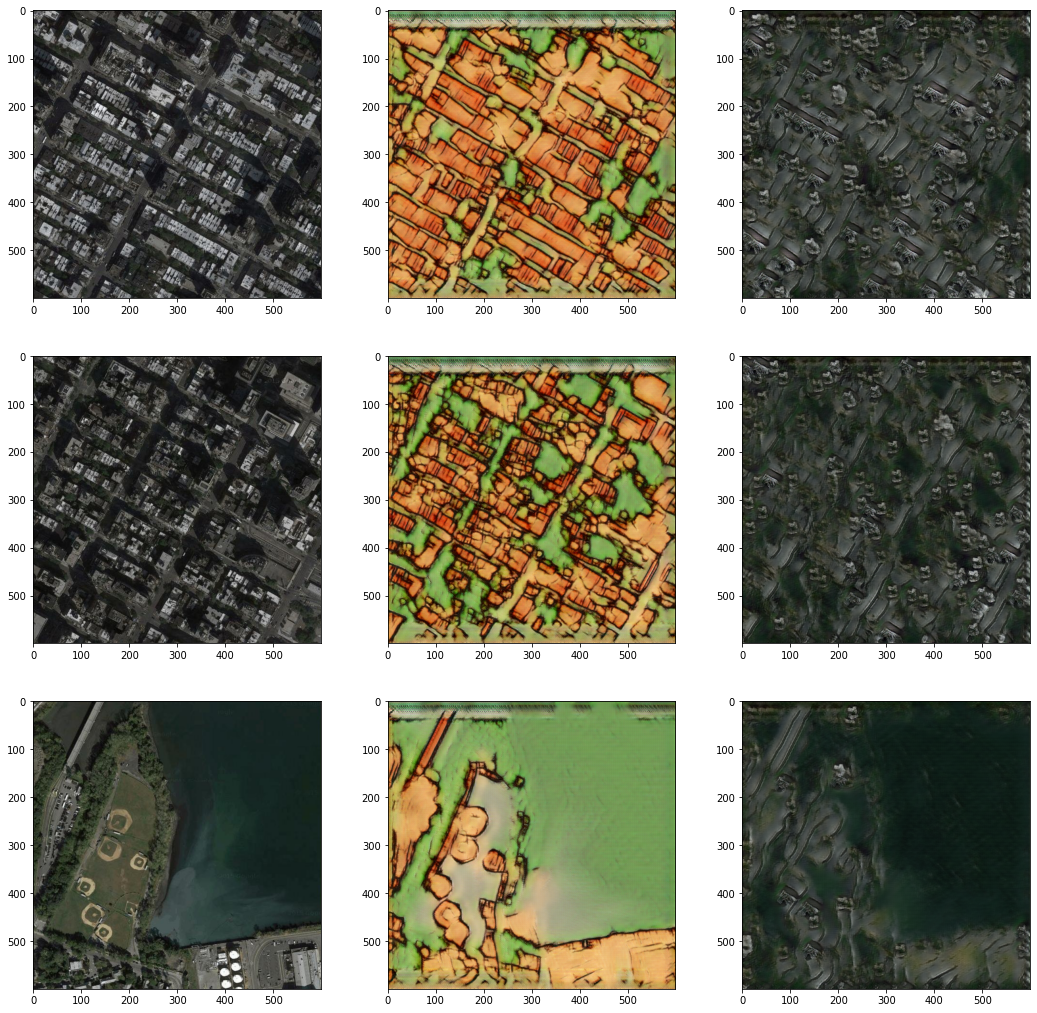

In [ ]:
l=os.listdir('/content/drive/MyDrive/cyclegan_maps/datasets/google_maps/trainA/')

g.eval()
f.eval()

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18,18))

for i in range(3):
    img0=imread('/content/drive/MyDrive/cyclegan_maps/datasets/google_maps/trainA/'+random.choice(l))
    ax[i,0].imshow(img0)
    img1=g(torch.unsqueeze(tr(img0),0))
    ax[i,1].imshow(np.rollaxis((torch.squeeze(img1.detach()).numpy()),0,3))
    img2=f(img1)
    ax[i,2].imshow(np.rollaxis((torch.squeeze(img2.detach()).numpy()),0,3))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


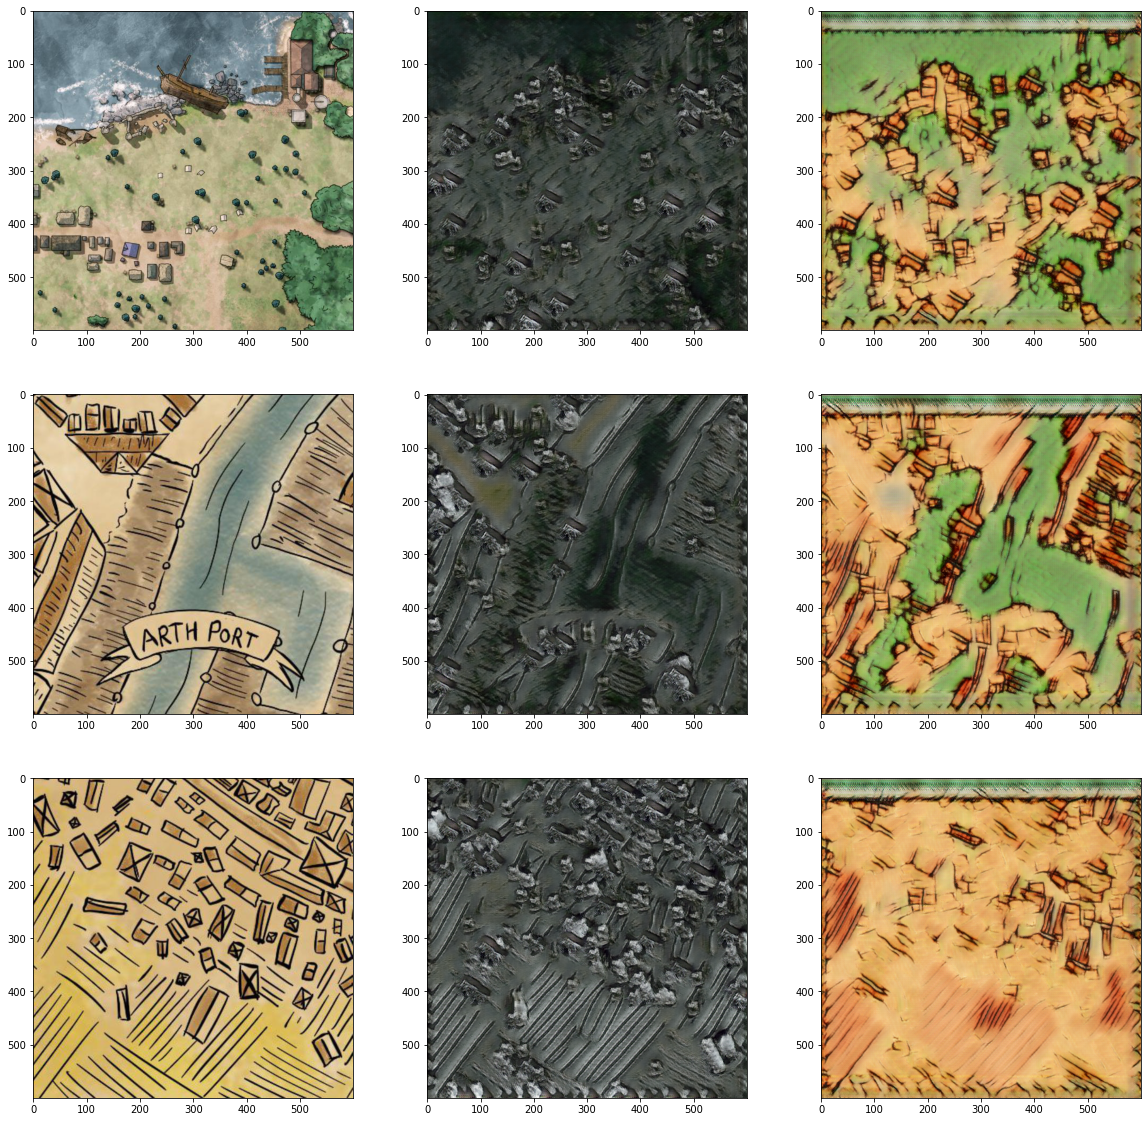

In [ ]:
l2=os.listdir('/content/drive/MyDrive/cyclegan_maps/datasets/city_maps_new/')


g.eval()
f.eval()

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20))

for i in range(3):
    img0=imread('/content/drive/MyDrive/cyclegan_maps/datasets/city_maps_new/'+random.choice(l2))
    ax[i,0].imshow(img0)
    img1=f(torch.unsqueeze(tr(img0),0))
    ax[i,1].imshow(np.rollaxis((torch.squeeze(img1.detach()).numpy()),0,3))
    img2=g(img1)
    ax[i,2].imshow(np.rollaxis((torch.squeeze(img2.detach()).numpy()),0,3))
plt.show()

Результаты так себе, если честно. Море зеленое, по краям какие-то полоски. Преобразование из карт в спутник вообще не выдерживает никакой критики. Полоски с краев я пыталась убрать с помощью махинаций с паддингом: я весь паддинг ставила в начало сети, чтобы не добавлять его на каждом слое. Но это не помогло. 
#  
Какие у меня есть мысли по поводу улучшения модели. Во первых, стоит взять более однородный датасет из карт, а то, как можно заметить, карты там достаточно сильно отличаются по стилю. Я, конечно, пыталась сделать универсальную сеть, которая бы работала с любыми картами, но не вышло. Затем, в оригинальной статье для картинок с таким разрешением использовали 9 реснет блоков, а не 6, как я, возможно, так бы получилось лучше.  